Name : Aaditya Mehetre<br>
BE A <br>
Roll no : 46

# Email Spam Detection using KNN and SVM

## Step 1: Loading and Exploring the Dataset


First, we load the email dataset and take a look at the structure of the data.


#Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install gdown
import gdown
import os

# creating .kaggle folder in root
os.makedirs('/root/.kaggle', exist_ok = True)

# id of the kaggle api file in my drive

from google.colab import userdata
KAGGLE_API = userdata.get('KAGGLE_API')

# initialising file of my api
output = '/root/.kaggle/kaggle.json'

# downloading my kaggle api file
gdown.download(f'https://drive.google.com/uc?id={KAGGLE_API}', output, quiet = False)

Downloading...
From: https://drive.google.com/uc?id=1cvPwbUHSiDFzI9rRl_jI7yLaTzviNRQt
To: /root/.kaggle/kaggle.json
100%|██████████| 65.0/65.0 [00:00<00:00, 191kB/s]


'/root/.kaggle/kaggle.json'

In [ ]:
!kaggle datasets download balaka18/email-spam-classification-dataset-csv

Dataset URL: https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv
License(s): ODbL-1.0
  0% 0.00/1.66M [00:00<?, ?B/s]
100% 1.66M/1.66M [00:00<00:00, 149MB/s]


In [ ]:
!unzip email-spam-classification-dataset-csv.zip -d dataset

Archive:  email-spam-classification-dataset-csv.zip
  inflating: dataset/emails.csv      


#Reading the dataset

In [ ]:
df = pd.read_csv('dataset/emails.csv')
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [ ]:
df.columns

Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)

## Step 2: Data Preprocessing


Let's start by dropping the unnecessary column `Email no.`. We do this since this column has no predictive power.


In [ ]:
df.drop('Email No.', axis = 1, inplace = True)
df

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,1,0,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,1,0,1


##Detecting and Removing null values if any.

In [ ]:
df.isnull().sum()

,0
the,0
to,0
ect,0
and,0
for,0
...,...
military,0
allowing,0
ff,0
dry,0


#Looking for duplicates and then removing them.

In [ ]:
# Checking for duplicates
df.duplicated().sum()

541

In [ ]:
# Removing duplicates
df = df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

##Converting column names to lower case to maintain consistency.

In [ ]:
df.columns = df.columns.str.lower()
df

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,1,0,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,1,0,1


##Let's check the distribution of predictor values.


In [ ]:
df['Prediction'].value_counts()

,count
Prediction,
0,3170
1,1461


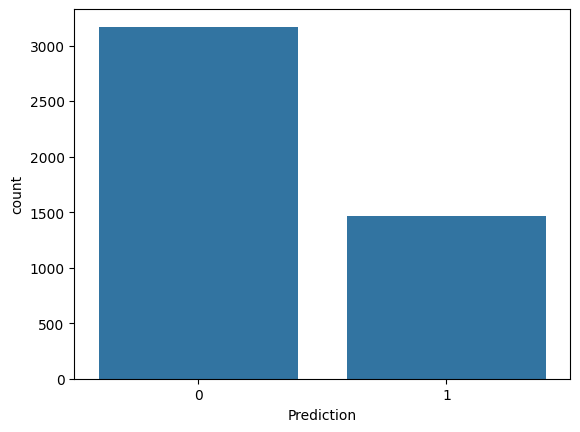

In [ ]:
sns.countplot(x = df['Prediction'])
plt.show()

We can see that the predictor is pretty imbalanced. We can fix that by stratified sampling the data. We will also be splitting the dataset into train and test sets.


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = df.drop('prediction', axis = 1)
y = df['prediction']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [ ]:
X_train.head()

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
1309,4,2,4,1,1,0,15,0,1,2,...,0,0,0,0,0,0,0,0,1,0
1530,7,3,3,4,1,1,41,1,1,14,...,0,0,0,0,0,0,0,0,0,0
2959,0,0,1,0,0,0,4,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2556,2,4,3,1,1,3,62,0,0,14,...,0,0,0,0,0,0,0,0,1,0
687,2,5,2,1,0,1,13,0,0,6,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
X_test.head()

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
380,1,1,1,0,0,0,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
580,7,9,6,9,7,7,135,3,1,19,...,0,0,0,0,0,0,0,0,0,0
1928,11,16,47,8,8,0,156,4,23,14,...,0,0,0,0,0,0,0,0,0,0
3500,3,5,7,0,4,0,27,1,2,5,...,0,0,0,0,0,0,0,0,1,0
3378,2,2,1,1,0,0,17,0,0,2,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train.head()

,prediction
1309,0
1530,0
2959,1
2556,1
687,0


In [ ]:
y_test.head()

,prediction
380,1
580,0
1928,0
3500,0
3378,0


In [ ]:
X.head()

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
y.head()

,prediction
0,0
1,0
2,0
3,0
4,0


We standardize the dataset to reduce skewness of any columns. We will be using `MinMaxScaler()` for this.


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##"Finding the Optimal K Value for K-Nearest Neighbors (KNN)

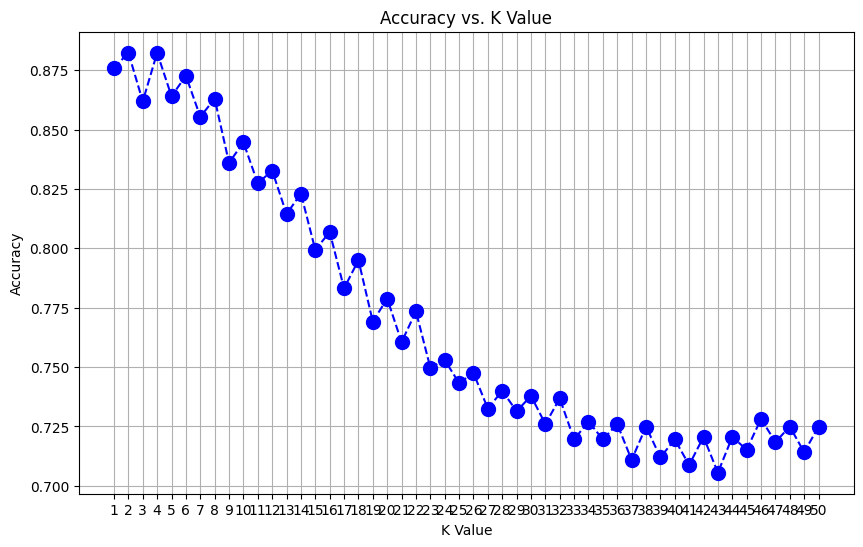

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = list(range(1, 51))
accuracy_scores = []

for k in k_values:

    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='dashed', color='blue', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [ ]:
optimal_k = k_values[np.argmax(accuracy_scores)]
print(f"Optimal K Value: {optimal_k}")

Optimal K Value: 2


##Training KNN Model with Optimal K Value for Accuracy Evaluation

In [ ]:
knn = KNeighborsClassifier(n_neighbors = optimal_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ",accuracy)

Accuracy:  0.8824163969795038


##Confusion Matrix Visualization for KNN Model

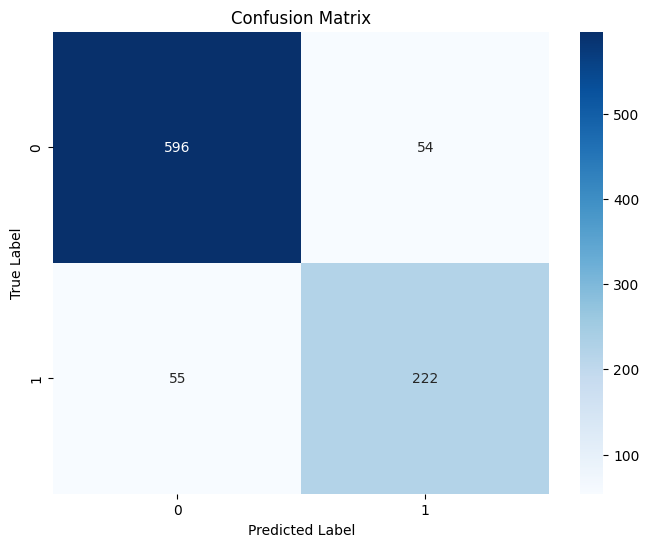

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = knn.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       650
           1       0.80      0.80      0.80       277

    accuracy                           0.88       927
   macro avg       0.86      0.86      0.86       927
weighted avg       0.88      0.88      0.88       927



##Evaluating Precision, Recall, and F1-Score

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.8043478260869565
Recall: 0.8014440433212996
F1-score: 0.8028933092224232


##Support Vector Machine (SVM) with Linear Kernel: Accuracy and Classification Report

In [ ]:
from sklearn.svm import SVC

# Linear Kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

accuracy_linear = accuracy_score(y_test, y_pred_linear)
print("Linear Kernel Accuracy:", accuracy_linear)
print(classification_report(y_test, y_pred_linear))


Linear Kernel Accuracy: 0.9654800431499461
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       650
           1       0.93      0.96      0.94       277

    accuracy                           0.97       927
   macro avg       0.95      0.96      0.96       927
weighted avg       0.97      0.97      0.97       927



##Support Vector Machine (SVM) with Polynomial Kernel: Accuracy and Classification Report

In [ ]:
# Polynomial Kernel
svm_poly = SVC(kernel='poly', degree=3)
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)

accuracy_poly = accuracy_score(y_test, y_pred_poly)
print("\nPolynomial Kernel Accuracy:", accuracy_poly)
print(classification_report(y_test, y_pred_poly))


Polynomial Kernel Accuracy: 0.7292340884573895
              precision    recall  f1-score   support

           0       0.73      0.97      0.83       650
           1       0.71      0.16      0.26       277

    accuracy                           0.73       927
   macro avg       0.72      0.57      0.55       927
weighted avg       0.72      0.73      0.66       927



##Support Vector Machine (SVM) with RBF Kernel: Accuracy and Classification Report

In [ ]:
# RBF Kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print("\nRBF Kernel Accuracy:", accuracy_rbf)
print(classification_report(y_test, y_pred_rbf))


RBF Kernel Accuracy: 0.9395900755124056
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       650
           1       0.97      0.82      0.89       277

    accuracy                           0.94       927
   macro avg       0.95      0.91      0.92       927
weighted avg       0.94      0.94      0.94       927



##Support Vector Machine (SVM) with Sigmoid Kernel: Accuracy and Classification Report

In [ ]:
# Sigmoid Kernel
svm_sigmoid = SVC(kernel='sigmoid')
svm_sigmoid.fit(X_train, y_train)
y_pred_sigmoid = svm_sigmoid.predict(X_test)

accuracy_sigmoid = accuracy_score(y_test, y_pred_sigmoid)
print("\nSigmoid Kernel Accuracy:", accuracy_sigmoid)
print(classification_report(y_test, y_pred_sigmoid))


Sigmoid Kernel Accuracy: 0.8500539374325782
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       650
           1       0.77      0.71      0.74       277

    accuracy                           0.85       927
   macro avg       0.83      0.81      0.82       927
weighted avg       0.85      0.85      0.85       927

